University of Zagreb<br/>
Faculty of Electrical Engineering and Computing<br/>
Department of Electronic Systems and Information Processing

Academic year 2020/2021

**2nd laboratory exercise**

*Digital Image Processing and Analysis* (183463)

Date: 2022-03-11

Please send any feedback (corrections, comments, suggestions etc.) regarding this document to franko.sikic@fer.hr.

© University of Zagreb Faculty of Electrical Engineering and Computing, 2021.

Permission is granted to make and distribute copies of this instructions provided the copyright notice and this permission notice are preserved on all copies.

# Introduction

Instructions for laboratory exercises for the course *Digital Image Processing and Analysis* are prepared in a form of a <a href="https://jupyter.org/">Jupyter</a> notebooks.

All problems in prepared notebook are intended to be completed in Python using <a href="https://colab.research.google.com">Google Colaboratory</a> platform (Colab for short).

## How to Submit Your Laboratory Report

Simply write-in your code to all empty code cells and write in your answers to the text cells with questions.

Empty code cells contain the placeholder text `# Write-in your solution` while text cells where you have to write-in someting contain a bold uppercase text **WRITE YOUR ANSWER HERE**.

Once you have completed all problems save this notebook locally in a file named DIPA_LAB_X_NAME_SURNAME.ipynb,
where X is the exercise number, and submit it via Moodle under the appropriate upload section.

Your submissions will be first automatically re-evaluated which corresponds to selecting the *Runtime/Restart and run all* command in Colab. Therefore, it is strongly suggested that you run this command yourself before submitting your notebook. Another thing to do before submission is to clear all the cell outputs by selecting *Edit/Clear all outputs*. This will reduce the size of .ipynb files for upload.

## Student Information

Before proceeding double click on this text and then fill in your name:

Name: Enio Krizman

Student ID number (JMBAG): 0069083848

## Suggested Reading

### General Reading

If you are not familiar with Python then start with a Python tutorial such as e.g. an official one available at <a href="https://docs.python.org/3/tutorial/">https://docs.python.org/3/tutorial/</a>.

Jupyter notebooks are relying on <a href="https://ipython.org/">IPython</a>, which is an interactive Python interpreter. Jupyter notebooks may be run locally or they may be conveniently executed remotely in Google Colaboratory via web browser.

Readers familiar with Matlab who have only basic knowledge of Python are strongly encouraged to read the document <a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">NumPy for Matlab users</a> before attempting to solve this laboratory exercise in Colab.

### Image Processing in Python

Some general image processing functions are available as a part of [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html). This basic functionality is extended by the [`scikit-image`](https://scikit-image.org/). We will also use [OpenCV](https://opencv.org/).

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing Required Functions

To simplify the code in Python in this notebook we may deliberately import functions from <a href="https://www.scipy.org/">SciPy</a>, <a href="https://numpy.org/">NumPy</a> and <a href="https://matplotlib.org/">Matplotlib</a> directly into the global namespace so e.g. we can write `fft` instead of `scipy.fft.fft`.

Please keep in mind that such an approach may be tolerated for the purpose of a short laboratory exercise where risks of collisions and side effects are minimal. It is best always avoided in production code.

If you prefer to use namespaces then feel free to change the import statements to retain strict package separation, e.g. `import numpy as np`.

In [ ]:
# Import packages
import cv2
import skimage.io

# To display images in browser
from google.colab.patches import cv2_imshow

# Import some functions to the global namespace for convenience
from scipy.ndimage import *
from scipy.fft import *
from scipy.signal import * 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import *
import PIL
from PIL import Image

## Image loading

We will be using images from the [USC-SIPI database](http://sipi.usc.edu/database/) and additional images available on the [DIPA class webpage](https://www.fer.unizg.hr/en/course/dipaa_b/laboratory#%23!p_rep_139398!_-187329). To load any of these images, all we have to do is copy the URL of the image and write the following two lines of code.

In [ ]:
url = "http://sipi.usc.edu/database/preview/misc/5.3.02.png"
img = skimage.io.imread(url, plugin = 'pil')

## Image representations

[Grayscale](https://en.wikipedia.org/wiki/Grayscale) images are composed exclusively of shades of gray. In a computer a 2D gray image is represented as an $M \times N$ matrix of pixel values, which merely represent light intensity. 

It takes several such matrices for colored images - one for each channel. There are several color models used for colored image representation. For instance, an [RGB](https://en.wikipedia.org/wiki/RGB_color_model) image has 3 channels (for red, green and blue color) so an $M \times N \times 3$ matrix is used.   Colored images can be converted to grayscale images, usually by performing a weighted sum of the channels. The [cv2.cvtColor()](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function is used to convert images from one color space to another.

These representations allow the use of common matrix operators for image processing and analysis. 

In [ ]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # openCV uses BGR (blue, green, red) representation
cv2_imshow(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

# 2.1 Quantization

Mathematically, quantization can be defined as mapping of the signal’s codomain from the space $\mathbb{R}$ (space
of real numbers) to the space $\mathbb{N}$ (space of natural numbers).

Quantization is a process where a signal transforms in a way that its values are rounded to a determined
(discrete) values (quantization levels). The difference between two neighboring quantization levels is a
quantization step or a quant. The basic idea of quantization is illustrated in the Fig 2.1.

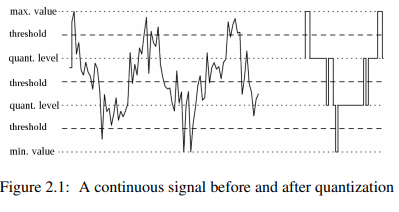

The relation of the quant and the number of bits needed for the quantization is given with $q = \frac{A}{2^B - 1}$, where q denotes the quant, B the number of bits, and A the (peak-to-peak) span of the signal values.

### **2.1.1 Problems**

1. What does the PIL function [Image.quantize()](https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=quantize#PIL.Image.Image.quantize) do? How can we use this function to uniformly quantize an image with N quantization levels?

In [ ]:
from skimage.util.dtype import img_as_float
image= cv2.imread("/content/drive/MyDrive/Images/prof_baltazar.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
image = Image.fromarray(image)
image1 = image.quantize(colors=4)
plt.imshow(image1)
plt.show()

image.quantize() kvantizira zadanu sliku tako da matricu zaokružuje na točno određene diskretne vrijednosti. Kvantizacijski leveli ovise o broju bitova u koje spremamo informaciju, tako za N razina nam treba N bitova za pohranu, a funkciju možemo upotrijebiti za uniformnu kvantizaciju tako da odaberemo broj željenih boja te sukladno tomu i broj kvantizacijskih razina(svakih 2^N je nova kvantizacijska razina od 2(1 bit) do 256(8 bitova)).

2. Write a function for quantizying an image img, so that the whole dynamical range of the pixel values in the given images is uniformly quantized into N levels. Let N and img be the input parameters of the function. This function will be used in some later problems in this exercise.

In [ ]:
# Write-in your solution
def quantize_bits(img, N):
  if N>8:
    return 0
  print(f'{N} bit')
  N = np.power(2, N)
  img = img.quantize(colors= N)
  return img

3. Read and display the images salona.png and knjiga_ssa.png before and after their quantization with different numbers of bits (1 to 8).

In [ ]:
# Write-in your solution
image1 = cv2.imread("/content/drive/MyDrive/Images/salona.png")
image2 = cv2.imread("/content/drive/MyDrive/Images/knjiga_ssa.png")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1 = Image.fromarray(image1)
plt.imshow(image1)
plt.show()
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2 = Image.fromarray(image2)
plt.imshow(image2)
plt.show()

N=1
while N<9:
  image3 = quantize_bits(image1, N)
  plt.imshow(image3)
  plt.show()
  N= N+1

N=1
while N<9:
  image4 = quantize_bits(image2, N)
  plt.imshow(image4)
  plt.show()
  N= N+1

4. At what number of bits do you notice the difference in image quality?

Razlika se primječuje nakon 3 bita informacije jer tada imamo 2^4 različitih kombinacija što je dovoljno za bolju razlučivost jer u ovim konkretnim slučajevima tada na slikama postoje 16 nijansi sive(uključujući crnu i bijelu) što je dovoljno za prikaz grayscale slike.

5. What is obtained by quantizying the image with 1 bit?

Kvantiziranjem slike za 1 bit kao posljedicu ima dobivanje samo dvije boje na slici-crnu i bijelu tj. dobiva se maksimalna dinamika.

6. What is the quantization noise? What is the maximum possible value of the quantization noise for the previous examples?

Kvantizacijski šum je efekt reprezentacije analognog kontinuiranog signala sa diskretnim brojem kao posljedica zaokruživanja na nižu ili višu razinu. kod kvantizacije  se vrijednost zaokružuje na najbliži cijeli broj, a maksimalna moguča vrijednost kvanziacijskog šuma obično se nalazi u granicama za 0.5 manjim ili večim od najnižeg bita.

# 2.2 Sampling

Mathematically, sampling can be defined as mapping of the signal’s domain from the space $\mathbb{R}$ to the space
$\mathbb{N}$.

Sampling of the signal is a process of creating a discrete signal from the continuous one, in a way
that the values (samples) are taken only in the certain places (or with certain time steps) from the original
continuous signal. If the samples are taken with a same spacing (i.e. sampling rate) throughout the whole
signal, the sampling is called homogeneous.

Sampling of an image is illustrated with the Fig 2.1. 
By choosing the sampling rate (the distance between
the samples that we want to take) in vertical and horizontal direction, we define the amount of information
that will be preserved.

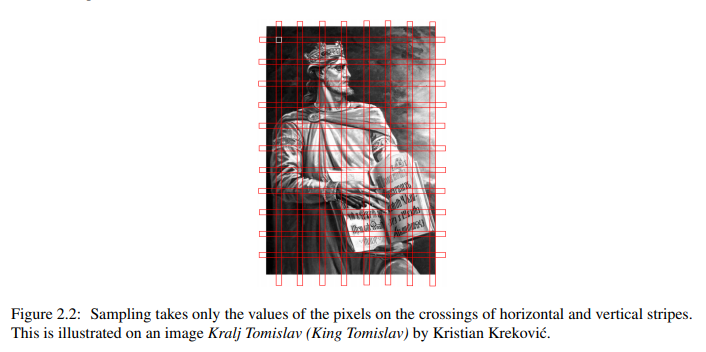

Since the digital computers are not able to store continuous signals, we work with dense sampled signals
instead. In these exercises, these dense sampled signals will be sampled with a smaller frequency (sample
rate) to demonstrate the effects of sampling. This process is called subsampling because it denotes taking a
subset from the existing samples. If we want to subsample an image, we simply take every N-th pixel.

## Example:

In [ ]:
klis2 = cv2.imread("/content/drive/MyDrive/Images/klis2.png")
klis2 = cv2.cvtColor(klis2, cv2.COLOR_BGR2GRAY) 
plt.figure(figsize=(8,8))
plt.imshow(klis2, cmap='gray')

N = 10
klisM = klis2[::N, ::N]

plt.figure(figsize=(8,8))
plt.imshow(klisM, cmap='gray')

### **2.2.1 Problems**

1. Read and subsample the image asinh1.tiff with factors (steps) of 1 to 10. Display and comment on the results. What happened? Explain why.

In [ ]:
# Write-in your solution
asinh = cv2.imread("/content/drive/MyDrive/Images/asinh1.tiff")
plt.imshow(asinh)

N=1
while N<11:
  asinhM = asinh[::N, ::N]
  plt.imshow(asinhM, cmap='gray')
  plt.show()
  N = N+1


Što je faktor uzrokovanja N veći to je veća razlika otipkane slike u odnosu na originalnu analognu jer se gubi sve više informacija o originalnoj slici. Razlog tomu je što definiranjem faktora N zapravo definiramo udaljenost između piksela koje želimo pohraniti(pohranjujemo svaki N-ti piksel-period otipkavanja) te što je N veći to se sprema manje informacija u digitaliziranu sliku i proces je brži, ali se gubi veći broj informacija. Svaka uzrokovana informacija iz analogne slike postaje piksel u digitalnoj slici te što je faktor uzrokovanja N veći to digitalizirana slika ima manje piksela i manje vjerno prikazuje originalnu sliku.

# 2.3 Pixelization

This part of the laboratory exercise demonstrates a so-called ”chessboard effect” caused by resolution reduction.

This effect can be used for hiding the person’s identity or censuring certain information in an
image, and is called pixelization. Schematical display of a pixelization procedure is given in the Fig 2.3.

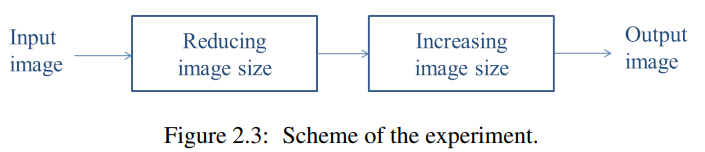

Decreasing the image size for a certain factor and increasing it for the same factor (by repeating the
existing values) has an effect of decreasing the image resolution.

Resizing the image can be done by calling the function [cv2.resize()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d).

## Example:

In [ ]:
def pixelize(img, N):
    img2 = cv2.resize(img, 
                      (int(img.shape[0] / N), int(img.shape[1] / N)), 
                      interpolation = cv2.INTER_NEAREST)
    
    img3 = cv2.resize(img2, 
                      (img2.shape[0] * N, img2.shape[1] * N), 
                      interpolation = cv2.INTER_NEAREST)
    
    return img3

In [ ]:
klisP = pixelize(klis2, 5)

plt.figure(figsize=(8,8))
plt.imshow(klisP, cmap='gray')

If we want to censure only a certain part of an image, which occupies a square area of 60×25 pixels, starting with a coordinate (20,32) we can just take a subarray of the image and pixelate it separately.

## Example:

In [ ]:
selected_area = klis2[20:20+60, 32:32+25]
klisP = pixelize(selected_area, 5)

plt.figure(figsize=(8,8))
plt.imshow(klisP, cmap='gray')

### **2.3.1 Problems**

1. Pick an object in the images salona.png and knjiga_ssa.png that you would like to censure. Use the previously described procedure in such a way that your resulting image displays the whole image, but with a selected object replaced with its pixelized version.

In [ ]:
# Write-in your solution
salona = cv2.imread("/content/drive/MyDrive/Images/salona.png")
plt.imshow(salona)
plt.show()

plt.figure(figsize=(8,8))
salona[100:200,50:150]=pixelize(salona[100:200,50:150],10)
plt.imshow(salona)
plt.show()
knjiga = cv2.imread("/content/drive/MyDrive/Images/knjiga_ssa.png")
plt.imshow(knjiga)
plt.show()
knjiga[50:150,0:400]=pixelize(knjiga[50:150,0:400],5)
plt.figure(figsize=(8,8))
plt.imshow(knjiga)
plt.show()

2. In the function [cv2.resize()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d), what is the meaning of the input parameter INTER_NEAREST?



INNER_NEAREST(nearest neighbor interpolation/najbliža susjedna interpolacija) je metoda interpolacije koja odabire vrijednost piksela najbliže susjedne točke unutar zadane slike ne uzimajući u obzir vrijednosti njoj susjednih točaka tj. izlaznom pikselu se dodjeljuje vrijednost(intenzitet) piksela koji je unutar određene susjedne točke na ulaznoj slici. Ovaj algoritam je brz, ali prouzrokuje manju kvalitetu slike.

# 2.4 Alias effect

According to [Shannon’s sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem/), the sampling frequency has to be twice as large as the maximum
frequency occuring in the signal, so that the signal could be correctly reconstructed. If the sampling frequency is not big enough, two signals of different frequencies can no longer be distinguished - they are
each other’s aliases.

This consequence is called aliasing or spectrum-overlap. This effect is illustrated in
the Fig 2.4. The figure shows the frequency domain of an image (its spectrum) as a single blue circle, and overlapping of the certain parts of the spectrum due to the to small sample rate. The scheme of the experiment
resulting in alias effect is given in the Fig 2.5.

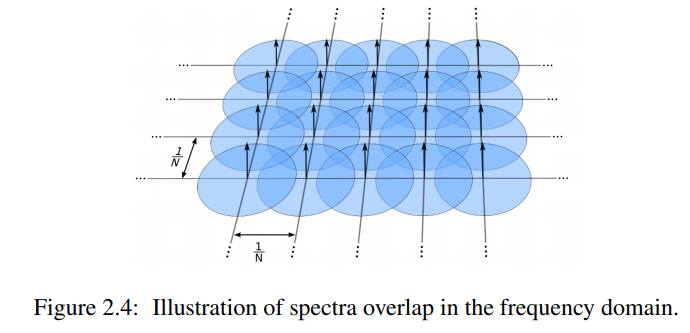

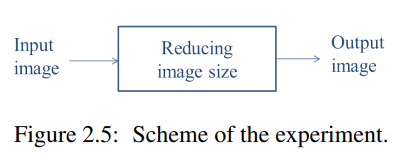

Overlapping of the spectra causes the interference of the two alias signals, resulting in a phenomenon called [Moiré’s effect](https://en.wikipedia.org/wiki/Moir%C3%A9_pattern). This phenomenon will be explained later.

If we want to reduce the image resolution and avoid overlapping of the spectra and the signal interference, high frequencies that occur in the signal (image) need to be cut-off before subsampling. The reason
for this is that the highest frequencies are the ones that could overlap. This can be obtained by filtering
the image before subsampling with a low-pass filter. The simplest version of low-pass filtering in a spatial
domain is spatial averaging of the image.

## Example:

In [ ]:
h = np.ones((3, 3)) / 9.0 #create an averaging filter with size 3x3
imgL = cv2.filter2D(klis2, -1, h) # apply the filter

plt.figure(figsize=(8,8))
plt.imshow(imgL, cmap='gray')

We can notice that with spatial filtering we lose certain information from the image as well. However, a (larger) loss of the information would occur by subsampling of the image. By prior averaging of the
image, we have blurred the pixel values so that the certain amount of information belonging to one pixel is
transfered to the pixel in the middle of the defined averaging filter. Therefore, this procedure can be seen
as storing as much as information as it is possible into a smaller number of pixels. Unfortunately, this is an
irreversible procedure.

### **2.4.1 Problems**

1. Read, blur and subsample the image asinh1.tiff with factors of 1 to 10. Compare the results with the ones obtained in previous (no blur) subsampling.

In [ ]:
# Write-in your solution
# Write-in your solution
asinh = cv2.imread("/content/drive/MyDrive/Images/asinh1.tiff")
plt.imshow(asinh)
h = np.ones((3, 3)) / 9.0 #create an averaging filter with size 3x3

N=1
while N<11:
  img = cv2.filter2D(asinh, -1, h)
  asinhM = img[::N, ::N]
  imgL = cv2.filter2D(asinhM, -1, h) # apply the filter
  plt.imshow(imgL, cmap='gray')
  plt.show()
  N = N+1


Filtar za usrednjavanje je niskopropusni filtar koji služi kako bi se uklonio šum sa slike tako što se s nje otklanjaju određene više frekvencije. Prigušivanjem šuma uočavaju se postupne promjene koje su prije bile nevidljive, stoga se niskopropusni filtar ponekad može koristiti za otkrivanje slabih detalja koje je prigušila buka.Slika se usrednjvanjem zamuti tako da se svaki piksel i njegovih osam susjeda množe s 1/9 i zbrajaju. Piksel u sredini zamjenjuje se zbrojem. To se ponavlja za svaki piksel na slici.Takvim postupkom sprema se veča količina informacija u manji broj piksela.

2. Read and subsample images testpat1.tif and testpat2.tif with a factor of 4. What happened to the high frequencies, and what happened to the low frequencies in these images?

Sub-sampling in the case of image processing mostly deals with image resizing. It's also called image scaling. The goal is to take an image and reduce its dimensions so that you get a smaller image as a result. Binning deals with keeping the image the same size (i.e. the same dimensions as the original) while reducing the amount of colours which ultimately reduces the amount of space the image takes up. Subsampling reduces the image size by removing information all together. Usually when you subsample, you also interpolate or smooth the image so that you reduce aliasing.
Bicubic interpolation considers 16 pixels (4×4). Images resampled with bicubic interpolation are smoother and have fewer interpolation artifacts.

In [ ]:
# Write-in your solution

testpat1 = cv2.imread("/content/drive/MyDrive/Images/testpat1.tif")
plt.imshow(testpat1)
plt.show()
N = 4
sub1 =testpat1[::N, ::N]
plt.imshow(sub1)
plt.show() 

testpat2 = cv2.imread("/content/drive/MyDrive/Images/testpat2.tif")
plt.imshow(testpat2)
plt.show()
N = 4
sub2 = testpat2[::N, ::N]
plt.imshow(sub2)
plt.show()



Niže frekvencije se zamute dok se više prigušuju.

3. Repeat the experiment but with blurring the image before subsampling. Compare the results.

In [ ]:
# Write-in your solution
testpat1 = cv2.imread("/content/drive/MyDrive/Images/testpat1.tif")
plt.imshow(testpat1)
plt.show()
#subsample x,y axis ba 1/2
testpat1 = cv2.filter2D(testpat1, -1, h)
N=4
sub1 =testpat1[::N, ::N]
plt.imshow(sub1)
plt.show()

testpat2 = cv2.imread("/content/drive/MyDrive/Images/testpat2.tif")
plt.imshow(testpat2)
plt.show()
#subsample x,y axis ba 1/2
testpat2 = cv2.filter2D(testpat2, -1, h)
N=4
sub2 =testpat2[::N, ::N]
plt.imshow(sub2)
plt.show()


Zamučivanjem slike prije otipkavanja dodatno se smanjuje šum sa slike, ali pojedini dijelovi postaju zamučeniji. Za prvu sliku upotreba filtra za usrednjavanje ima posljedicu da su se smanjenjem šuma dodatno izoštrili pojedini dijelovi slike te se detalji vide jasnije što je zasigurno pozitivan utjecaj, dok u drugoj slici upotreba filtra je samo doatno zamutila sliku bez da je utjecaj otklanjanja šuma naočigled vidljiv. Zaključno, u ovisnosti o slici treba pronaći omjer između zamučenja slike i smanjenja šuma kako bi krajnja slika što više bila bliža originalnoj.

4. How do the results depend on the size of the averaging filter?

Povečanjem nisko propusnog filtra prouzrokuje jače zamučenje pojedinih dijelova i detalja slike te je više informacija sadržano u 1 pikselu kako je njegova vrijednost nastala kao zbroj više susjednih vrijednosti piksela pomnoženih s konstantom. Veći filtar,s druge strane, znači dodatno smanjenje šuma zbog čega se nisko propusni filtri prvenstveno i koriste te sukladno prošlom zaključku treba naći veličinu filtra koji pruža najbolji omjer između otklanjanja šuma i zamučenja detalja sa slike.

5. Read and subsample the image uzorak.tif it by a factor of 3, but only in the x-axis direction.

In [ ]:
# Write-in your solution
uzorak = cv2.imread("/content/drive/MyDrive/Images/uzorak.tif")
plt.imshow(uzorak)
plt.show()
#subsample x,y axis ba 1/2
N=3
sub1 = uzorak[::, ::N]
plt.imshow(sub1)
plt.show()

6. Read and subsample the image uzorak.tif by a factor of 2, but only in the y-axis direction.

In [ ]:
uzorak = cv2.imread("/content/drive/MyDrive/Images/uzorak.tif")
plt.imshow(uzorak)
plt.show()
#subsample x,y axis ba 1/2
N=2
sub1 = uzorak[::N, ::]
plt.imshow(sub1)
plt.imshow(sub1)
plt.show()

7. What happened in the first case and what happened in the second case? Why?

Uzrokovanjem u x smjeru izgubljeno je puno više inormacija nego li je to slučaj s uzrokovanjem u y smjeru jer je frekvencija informacija(uzoraka) u x smjeru puno veća.

8. Read and reduce the sizes of the images testpat1.tif and testpat2.tif 4 times using the function [cv2.resize()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d). Are these results different than the ones obtained before with the same images? Why?

In [ ]:
# Write-in your solution
sub1 = cv2.resize(uzorak, None, fx=1, fy=2, interpolation = cv2.INTER_CUBIC)
testpat1 = cv2.imread("/content/drive/MyDrive/Images/testpat1.tif")
plt.imshow(testpat1)
plt.show()
#subsample x,y axis ba 1/2
sub1 = cv2.resize(testpat1, None, fx=1/4, fy=1/4, interpolation = cv2.INTER_CUBIC)
plt.imshow(sub1)
plt.show()

testpat2 = cv2.imread("/content/drive/MyDrive/Images/testpat2.tif")
plt.imshow(testpat2)
plt.show()
#subsample x,y axis ba 1/2
sub2 = cv2.resize(testpat2, None, fx=1/4, fy=1/4, interpolation = cv2.INTER_CUBIC)
plt.imshow(sub2)
plt.show()


"Resize" kao i postupak otipkavanja smanjuje rezoluciju slike(broj piksela) te iako na prvu slike izgledaju istovjetne, imaju zaseban mehanizam nastajanja. Kod otipkvanja uzima se svaki N-ti piksel s originalne slike, dok kod promjene veličine novi pikseli nastaju kao kombinacija dotadašnjih(u bikubičnoj interpolaciji kao kombinacija prošlih 4x4 piksela) te se informacija o prošlim vrijednostima piksela ne gubi u potpunosti. Otipkavanje je proces koji se koristi kada se analogni signal pretvara u digitalni, dok je "resize" proces koji se koristi kada treba promijeniti veličinu zadane slike.



9. Can we use this function to avoid pre-filtering of the image? Why?

Ne možemo jer postupak predfiltriranaj je vezan za smanjenje šuma otklanjanjem viših frekvencija čime se sprječava preklapanje spektra, dok postupkom "resize" se ne otklanjaju više frekvencije slike te sukladno tomu taj postupak ne utječe na otklanjanje neželjenog šuma.

10. Read the image klis2.png and demonstrate the alias-effect on it.

In [ ]:
# Write-in your solution
klis2 = cv2.imread("/content/drive/MyDrive/Images/klis2.png")
plt.imshow(klis2)
plt.show()

N=1
while N<6:
  klis = klis2[::N, ::N]
  plt.imshow(klis, cmap='gray')
  plt.show()
  N = N+1

print()

N=1
while N<6:
  blur = cv2.filter2D(klis2, -1, h)
  klis = blur[::N, ::N]
  plt.imshow(klis, cmap='gray')
  plt.show()
  N = N+1


Nakon određenog koeficjenta otipkavanja N, više nije zadovoljen Nyquistov kriterij te dolazi do preklapanja spektra te se gubi dio originalne informacije/slike što se vidi u prmjeru slikama koji nemaju filtar prije otipkavanja. Alias efekt ili preklapanje spektra je posljedica nedovoljne učestalosti uzorkovanja nekog analognog signala, a očituje se kao pojava lažnog nisko-frekventnog signala te dva signala koji su različitig frekvencija više ne razlikujemo(postaju alias jedno drugom).

# 2.5 Moiré effect

Moiré effect was discovered way before the digital computers area, as a phenomenon that occurs when
different patterns (of for example cloth) overlap. Moiré effect is basically a consequence of interference of
different patterns (or waves). If we consider a signal as a wave, we can conclude that Moiré effect appears
when the spectra overlap and the alias of a signal appears.

### **2.5.1 Problems**

1. Read and subsample the image AB2.tiff with a factor of 39 in the y-axis direction. Display the original and the subsampled version of the image and comment on the results.

In [ ]:
# Write-in your solution
uzorak = cv2.imread("/content/drive/MyDrive/Images/AB2.tiff")
plt.imshow(uzorak)
plt.show()
#subsample x,y axis ba 1/2
N=39
sub1 = uzorak[::N, ::]
plt.imshow(sub1)
plt.imshow(sub1)
plt.show()

Do Moire efekta dolazi kada kod određenog faktora otipkavanja dolazi do preklapanja spektra kao posljedica nedovoljne učestalosti uzorkovanja nekog analognog signala. U ovom slučaju uzimamo svaki 39 piksel u y smjeru te dolazi do nevjerodostojnog prikaza originalne slike koja ima ponavljajući uzorak.Razlog tomu je što nije ispoštovan Nyquistov zahtjev za urokovanje koji kazuje da frekvencija uzorkovanja mora biti veća od dvostruke frekvencije ulaznog signala kako bi rekonstrukcija izvornog signala bila potpuna.

2. What happens if you perform subsampling in the y-axis direction with some other factor? Read and subsample the image AB2.tiff with factors of 37, 40 and an arbitrarily chosen one.

In [ ]:
# Write-in your solution
uzorak = cv2.imread("/content/drive/MyDrive/Images/AB2.tiff")
plt.imshow(uzorak)
plt.show()
#subsample x,y axis ba 1/2
N=37
sub1 = uzorak[::N, ::]
plt.imshow(sub1)
plt.imshow(sub1)
plt.show()
N=40
sub1 = uzorak[::N, ::]
plt.imshow(sub1)
plt.imshow(sub1)
plt.show()

Zaključak je istovjetan onom iz prošlog primjera, jedina je razlika što se uzima svaki 37, odnosno 40 piksel te iako su ti brojevi podosta blizu broju 39, krajnja slike koje su nastale kao posljedica otipkavanja se u potpunosti razlikuju. Zaključno, niti jedan od prethodna 3 primjera nije zadovoljio Nyquistov zahtjev uzrokovanja te iako su frekvencije otipkavanja bile veoma blizu, kao krajnji rezultat dobili smo 3 u potpunosti različite slike.

3. Read and subsample the image hsokol.png or rolete.png with a factor of 5. Display the original and the subsampled version of the image and comment on the results.

In [ ]:
# Write-in your solution
uzorak1 = cv2.imread("/content/drive/MyDrive/Images/rolete.png")
plt.imshow(uzorak1)
plt.show()
#subsample x,y axis ba 1/2
N=5
sub1 = uzorak1[::N, ::N]
plt.imshow(sub1)
plt.show()

uzorak2 = cv2.imread("/content/drive/MyDrive/Images/hsokol.png")
plt.imshow(uzorak2)
plt.show()
#subsample x,y axis ba 1/2
N=5
sub1 = uzorak2[::N, ::N]
plt.imshow(sub1)
plt.show()

Moireov uzorak(efekt) nastaje kada se dva slična uzorka na ravnoj ili zakrivljenoj površini stave jedan povrh drugog malo zarotirani, a to se upravo događa kod otipkavanja nakon određenog faktora jer kod sličnih uzoraka poput roletni i cigli dolazi do preklapanja spektra tj. alliasinga. Kod primjera ciglene zgrade, ako uzorak piksela padne na cigle, očito da će biti piksel u boji cigle,a ako padne na beton između, bit će svijetlo sive boje. Ako interval uzorkovanja gotovo odgovara razmaku cigle, uzorkovanje će pasti na svijetlosive piksele nekoliko puta zaredom, a zatim će nekoliko puta za redom pasti na piksele cigle plave boje čime će nastati Moireov efekt.

Moiré effect can also appear during the scanning of the images. Due to the overlapping of the frequency
spectra, aliases and interference patterns appear. Since we can not demonstrate scanning, again we will
simulate it by subsampling of the images of great resolutions.

### **2.5.2 Problems**

1. Images testpat_circ.tif and asinh2.tiff were scanned with a 300 dpi (dots per inch) resolution. Read them and simulate what would have happened if they were scanned with a smaller resolution (200, 100 or 50 dpi).

In [ ]:
# Write-in your solution
img1 = cv2.imread("/content/drive/MyDrive/Images/testpat_circ.tiff")
plt.imshow(img1)
plt.show()

sub11 = cv2.resize(img1, None, fx=2/3, fy=2/3, interpolation = cv2.INTER_CUBIC)
plt.imshow(sub11)
plt.show()

sub12 = cv2.resize(img1, None, fx=1/3, fy=1/3, interpolation = cv2.INTER_CUBIC)
plt.imshow(sub12)
plt.show()

sub13 = cv2.resize(img1, None, fx=1/6, fy=1/6, interpolation = cv2.INTER_CUBIC)
plt.imshow(sub13)
plt.show()

img2 = cv2.imread("/content/drive/MyDrive/Images/asinh2.tiff")
plt.imshow(img2)
plt.show()
sub21 = cv2.resize(img2, None, fx=2/3, fy=2/3, interpolation = cv2.INTER_CUBIC)
plt.imshow(sub21)
plt.show()

sub22 = cv2.resize(img2, None, fx=1/3, fy=1/3, interpolation = cv2.INTER_CUBIC)
plt.imshow(sub22)
plt.show()

sub23 = cv2.resize(img2, None, fx=1/6, fy=1/6, interpolation = cv2.INTER_CUBIC)
plt.imshow(sub23)
plt.show()